# Title: Feature Transformation

<b>Apply LDA Algorithm on Iris Dataset and classify which species a given flower belongs to.</b>

Dataset Link:https://www.kaggle.com/datasets/uciml/iris

In [2]:
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
df = pd.DataFrame(iris.data, columns = iris.feature_names) # Load iris dataset into dataframe
new_cn = ['sl', 'sw', 'pl', 'pw'] #Define new column name
df.columns = new_cn #Replace old column names with new columns name

df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names) # make new column species and load target names

df.head()

,sl,sw,pl,pw,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.shape

(150, 5)

In [6]:
X = df[['sl', 'sw', 'pl', 'pw']]
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [7]:
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [8]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='accuracy', cv = cv, n_jobs=-1)
print(np.mean(scores))

0.9800000000000001


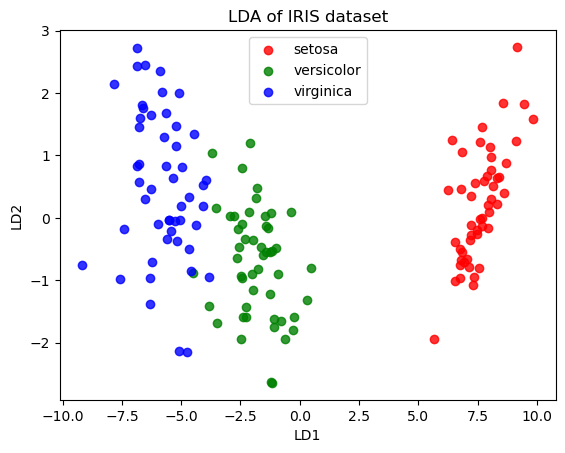

In [11]:
X = iris.data
y = iris.target
data_plot = model.fit(X, y).transform(X)
colors = ['red', 'green', 'blue']
for i, color in zip([0,1,2], colors):
    plt.scatter(data_plot[y==i,0], data_plot[y==i,1], label = iris.target_names[i], alpha=0.8, color=color)
plt.legend(loc='best')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA of IRIS dataset')
plt.show()

In [10]:
# define new observation
new = [5, 2, 1, .4]

# predict which class the new observation belongs to
predicted_class = model.predict([new])
print("Predicted class for new observation:", predicted_class[0])

Predicted class for new observation: 0
